In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import os
import tensorflow as tf
from pygments.formatters import img
from tensorflow import keras
from PIL import Image;
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape
#len(train_labels)
#train_labels
#test_images.shape
len(test_labels)
print(test_labels)
#print(test_images[0])

[9 2 1 ... 8 1 5]


In [4]:
#This is a file converter
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt


def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    #print(tva)
    return tva
def convert(destination):
    x=[imageprepare(destination)]#file path here
    #print(len(x))# mnist IMAGES are 28x28=784 pixels
    #print(x[0])
#Now we convert 784 sized 1d array to 24x24 sized 2d array so that we can visualize it
    newArr=[[0 for d in range(28)] for y in range(28)]
    k = 0
    for i in range(28):
        for j in range(28):
            newArr[i][j]=x[0][k]
            k=k+1

    #for i in range(28):
        #for j in range(28):
            #print(newArr[i][j])
        # print(' , ')
        #print('\n')


    plt.imshow(newArr, interpolation='nearest')
    plt.savefig('/Users/danielnguyen/PycharmProjects/BoilerMake/venv/lib/TestData1/TestResults/data1.png')#save MNIST image
    plt.show()#Show / plot that image
    return newArr



In [5]:
#data1 = Image.open('/Users/danielnguyen/PycharmProjects/BoilerMake/TestData1/shop.png')
#data1.show()
#data1.shape

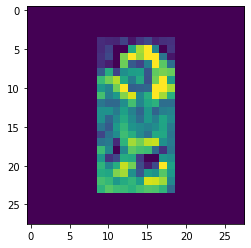

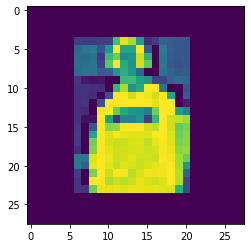

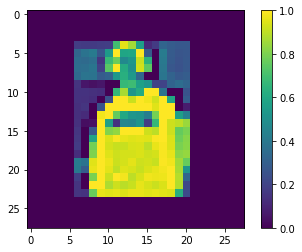

In [6]:
testData = convert('/Users/danielnguyen/PycharmProjects/BoilerMake/venv/lib/TestData1/Data2.png')
trainData = convert('/Users/danielnguyen/PycharmProjects/BoilerMake/venv/lib/TestData1/train1.png')
plt.figure()
plt.imshow(testData)#sho
plt.imshow(trainData)# w picture of test data
#plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
New_train_labels = np.copy(train_labels)

In [8]:
#trainData

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0
#testData = testData / 255.0
#train_images = np.append(train_images,trainData)
New_train_labels.flags.writeable = True
#New_train_labels = np.append(train_labels,6)
#train_images.shape
test_images[0] = testData


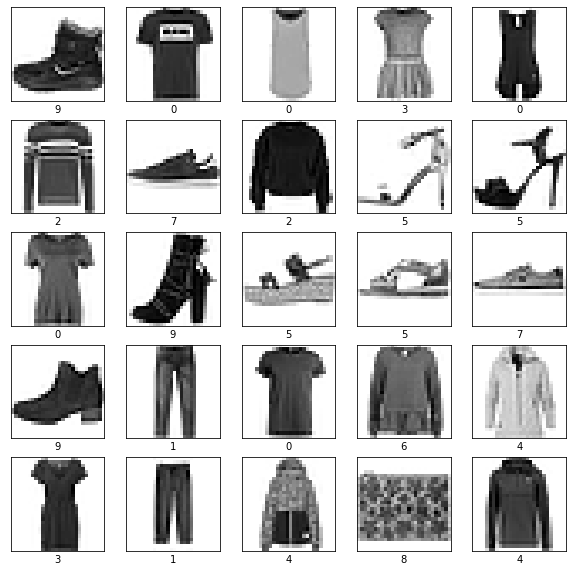

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(New_train_labels[i])
    
plt.show()



In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [14]:
model.fit(train_images, New_train_labels, epochs=17)
#works at 17



Train on 60000 samples
Epoch 1/17
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4965 - accuracy: 0.8239
Epoch 2/17
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3763 - accuracy: 0.8645
Epoch 3/17
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3366 - accuracy: 0.8779
Epoch 4/17
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3114 - accuracy: 0.8841
Epoch 5/17
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2912 - accuracy: 0.8924
Epoch 6/17
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2780 - accuracy: 0.8986
Epoch 7/17
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2660 - accuracy: 0.9009
Epoch 8/17
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2555 - accuracy: 0.9048
Epoch 9/17
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2443 - accuracy: 0.9081
Epoch 10/17
60

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3512 - accuracy: 0.8824

Test accuracy: 0.8824


In [16]:
predictions = model.predict(test_images)
#predictions = model.predict(data1)


In [17]:
predictions[0]


array([9.5430458e-01, 1.6445419e-02, 3.6199125e-03, 1.9752323e-03,
       1.4412826e-02, 8.5019769e-07, 7.4358885e-03, 1.0089423e-03,
       7.8905822e-04, 7.3124588e-06], dtype=float32)

In [18]:
class_names[np.argmax(predictions[0])]




'T-shirt/top'